### Классификационные деревья

In [130]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
wbc = pd.read_csv('wbc.csv')
print(wbc.head(5))

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [131]:
print(wbc.shape)

(569, 33)


In [132]:
X = wbc.drop(['diagnosis', 'id', 'Unnamed: 32'], axis=1).values
y = wbc['diagnosis'].values
print(X.shape, y.shape)

(569, 30) (569,)


In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2024, stratify=y)
dt = DecisionTreeClassifier(max_depth=2, random_state=2024)

In [134]:
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9230769230769231


### Набор данных UniversalBank

### Подключение библиотек

In [135]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

### Загрузка датасета

In [136]:
df = pd.read_csv('UniversalBank.csv')
df.head(5)

,Row,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### Удаление лишних столбцов

In [137]:
df = df.drop(columns=['Row', 'ZIP Code'])

### Разделение данных на признаки и целевую переменную

In [138]:
X = df.drop(columns=['Personal Loan'])
y = df['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2024, stratify=y)

### Построение дерева решений

In [139]:
dt = DecisionTreeClassifier(max_depth=3, random_state=2024, criterion='entropy')
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=2024)

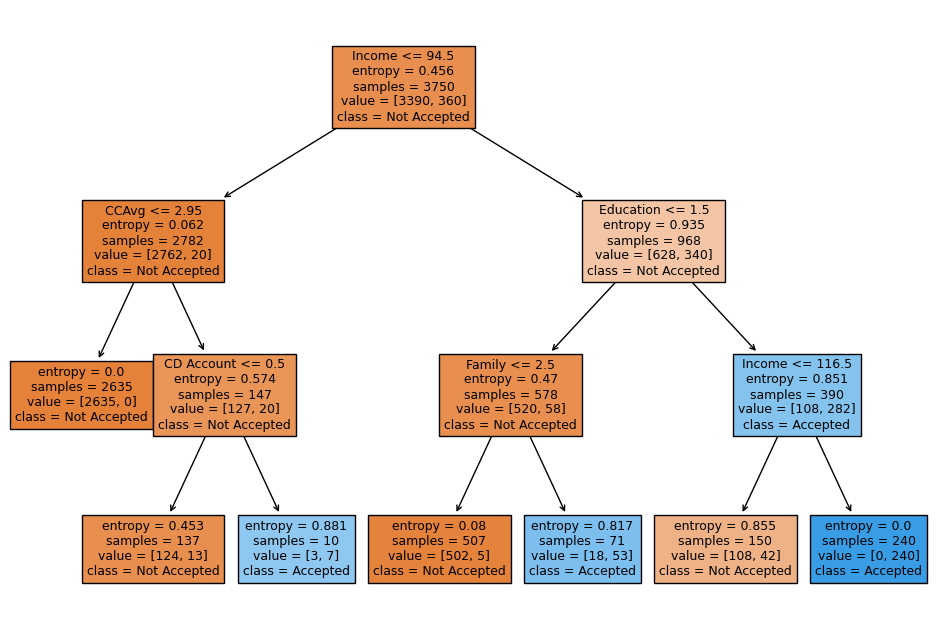

In [140]:
plt.figure(figsize=(12,8))
tree.plot_tree(dt, filled=True, class_names=['Not Accepted', 'Accepted'], feature_names=list(X_train.columns))
plt.show()

### Набор данных mushrooms

### Загрузка пакетов

In [141]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

### Загрузка данных

In [142]:
data = pd.read_csv('mushrooms.csv')
data.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [143]:
print(data.shape)

(8124, 23)


### Создание числнных переменных OneHotEncoding

In [144]:
data_encoded = pd.get_dummies(data, drop_first=True)
data_encoded.head()

,class_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,True,False,False,False,False,True,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False,True,False,False,...,True,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,True,False,False,False
3,True,False,False,False,False,True,False,False,True,False,...,False,True,False,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False


### Разделение датасета на признаки и целевую переменную

In [145]:
X = data_encoded.drop('class_p', axis=1)
y = data_encoded['class_p']
print(X.columns.values)
print(X.shape)

['cap-shape_c' 'cap-shape_f' 'cap-shape_k' 'cap-shape_s' 'cap-shape_x'
 'cap-surface_g' 'cap-surface_s' 'cap-surface_y' 'cap-color_c'
 'cap-color_e' 'cap-color_g' 'cap-color_n' 'cap-color_p' 'cap-color_r'
 'cap-color_u' 'cap-color_w' 'cap-color_y' 'bruises_t' 'odor_c' 'odor_f'
 'odor_l' 'odor_m' 'odor_n' 'odor_p' 'odor_s' 'odor_y' 'gill-attachment_f'
 'gill-spacing_w' 'gill-size_n' 'gill-color_e' 'gill-color_g'
 'gill-color_h' 'gill-color_k' 'gill-color_n' 'gill-color_o'
 'gill-color_p' 'gill-color_r' 'gill-color_u' 'gill-color_w'
 'gill-color_y' 'stalk-shape_t' 'stalk-root_b' 'stalk-root_c'
 'stalk-root_e' 'stalk-root_r' 'stalk-surface-above-ring_k'
 'stalk-surface-above-ring_s' 'stalk-surface-above-ring_y'
 'stalk-surface-below-ring_k' 'stalk-surface-below-ring_s'
 'stalk-surface-below-ring_y' 'stalk-color-above-ring_c'
 'stalk-color-above-ring_e' 'stalk-color-above-ring_g'
 'stalk-color-above-ring_n' 'stalk-color-above-ring_o'
 'stalk-color-above-ring_p' 'stalk-color-above-ring_w'
 

### Разделение данных на тренировочные и тестовые

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2024, stratify=y)

### Строим модель на основе DT

In [147]:
dt_model = DecisionTreeClassifier(max_depth=6, random_state=2024)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=2024)

### Построение матрицы ошибок

In [148]:
y_pred_test = dt_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
print(conf_matrix)

[[1047    5]
 [   1  978]]


### Визуализация матрицы ошибок

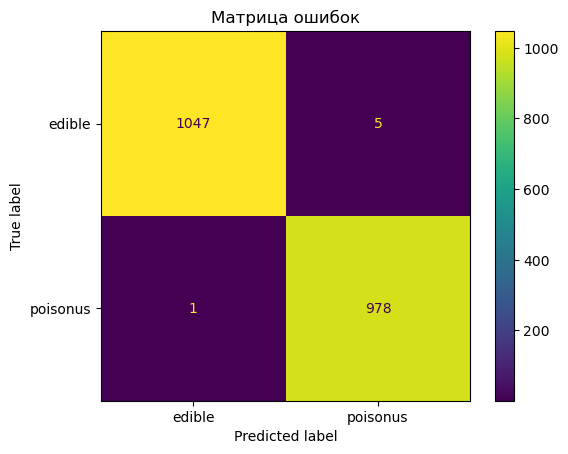

In [149]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['edible', 'poisonus'])
disp.plot(values_format='d')
plt.title('Матрица ошибок')
plt.show()

### Оценка точности предсказания для набора train

In [150]:
y_pred_train = dt_model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f'Оценка точности для train: {accuracy_train:.4f}')

Оценка точности для train: 0.9966


### Оценка точности предсказания для набора test

In [151]:
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f'Оценка точности для test: {accuracy_test:.4f}')

Оценка точности для test: 0.9970


### Важные признаки

In [152]:
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': dt_model.feature_importances_})
top_feature = feature_importances.sort_values(by='Importance', ascending=False).head(5)
print(top_feature)

                Feature  Importance
22               odor_n    0.623125
42         stalk-root_c    0.176913
44         stalk-root_r    0.088257
80  spore-print-color_r    0.032883
20               odor_l    0.024940


### Визуализация дерева решений

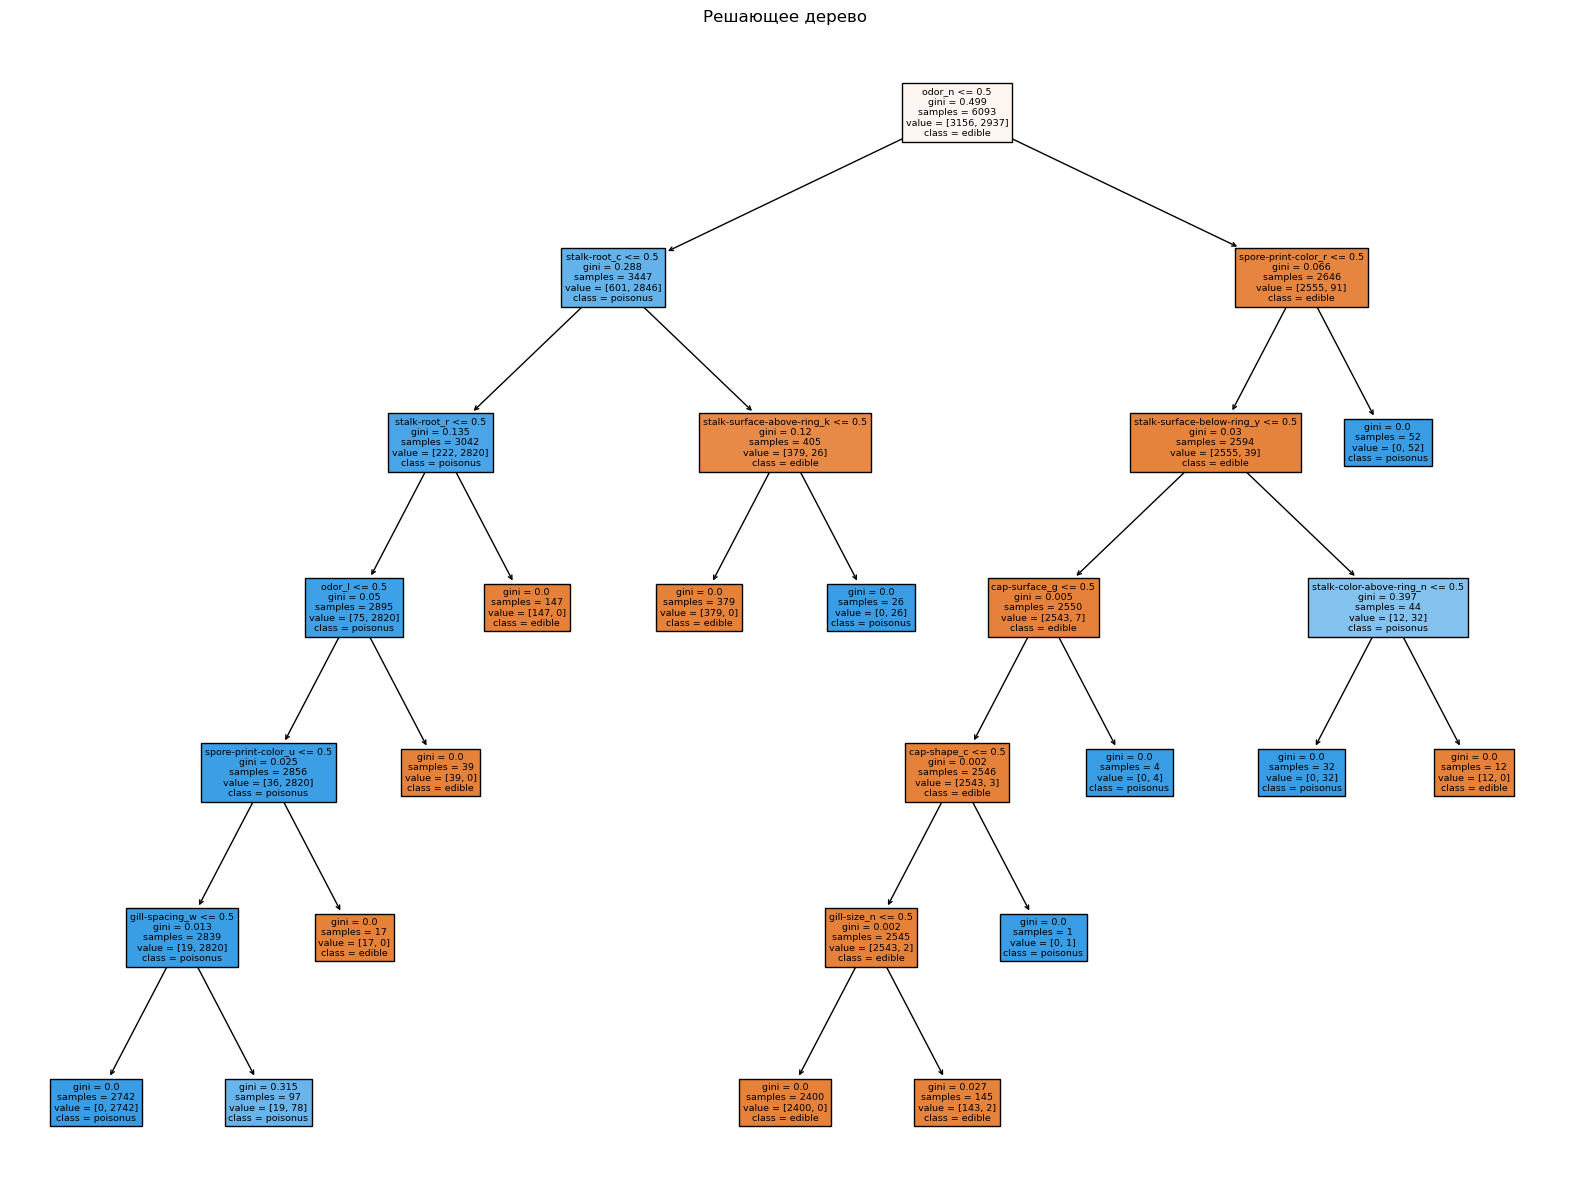

In [153]:
plt.figure(figsize=(20,15))
plot_tree(dt_model, filled=True, class_names=['edible', 'poisonus'], feature_names=list(X_train.columns))
plt.title('Решающее дерево')
plt.show()